# Examples of Open Evolutions

In [2]:
%reload_ext autoreload

import numpy as np 
import matplotlib.pyplot as plt
import math as math 
import cmath as cmath
from scipy import linalg as linalg
from scipy import integrate as integ
from scipy.integrate import solve_ivp

import sys
import os
sys.path.append(os.path.abspath('../src'))

from Objects import Quantum_State, Hamiltonian, Symplectic, Decoherence
from QIT_Functions import Extract_Qubit_Labels_Array
import Gaussian as Gaussian


## Gaussian Diffuive Dynamics: 
### Coherent State in a Quantum Harmonic Oscillator with Diffusion

This is a time independent gaussian Hamiltonian
Initializing a Gaussian State
Computing the Gaussian Time-Indipendent Dynamics of a Gaussian State


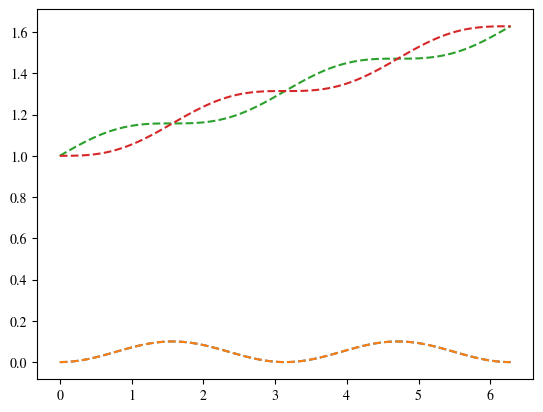

In [9]:
B_mat = 0.1*np.array([[1.,0.],[0.,0.]])

N_qubits = 1
n_modes = 1


Dec = Decoherence(N_qubits,n_modes,'Canonical', B_mat)

########################## Hamiltonians ##########################

H_1_gauss = Hamiltonian(N_qubits, n_modes)

H_null = np.zeros((2*n_modes,2*n_modes)) 
iden = np.eye(2*n_modes)
r_null = np.zeros((2*n_modes,1)) 

H_m = np.eye(2)
r_m = r_null
H_q = H_null
r_q = r_null

H_q_0_array = np.array([0 +0*1j])

H_1_gauss.Initialize_Constant_Hamiltonians([H_m], [r_m], H_q_0_array)

########################## Initialize State ##########################

r_0 = np.array([[1.0],
                [0.0]])
sigma_0 = iden
rho_q_0 = np.ones((2*N_qubits,2*N_qubits))/(2**(2*N_qubits))

Gaussian_State = Quantum_State(N_qubits, n_modes)
Gaussian_State.Initialize_Gaussian_State(r_0, sigma_0, rho_q_0)

########################## Dynamics ##########################

t_array = np.linspace(0,2*np.pi, 100)
Gaussian_State.Open_Dynamics_Numerical(H_1_gauss, Dec, t_array)

plt.plot(t_array,Gaussian_State.sigma_t[:,0,1], '--')
plt.plot(t_array,Gaussian_State.sigma_t[:,1,0], '--')
plt.plot(t_array,Gaussian_State.sigma_t[:,1,1], '--')
plt.plot(t_array,Gaussian_State.sigma_t[:,0,0], '--')


### Coherent State in a Quantum Harmonic Oscillator with Cavity Decay

This is a time independent operator-valued general Hamiltonian
This is a time independent operator-valued force Hamiltonian
This is a time independent gaussian Hamiltonian
Initializing a Gaussian State
Initializing a Gaussian State
Initializing a Gaussian State
Computing the Gaussian Time-Indipendent Dynamics of a Gaussian State


/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


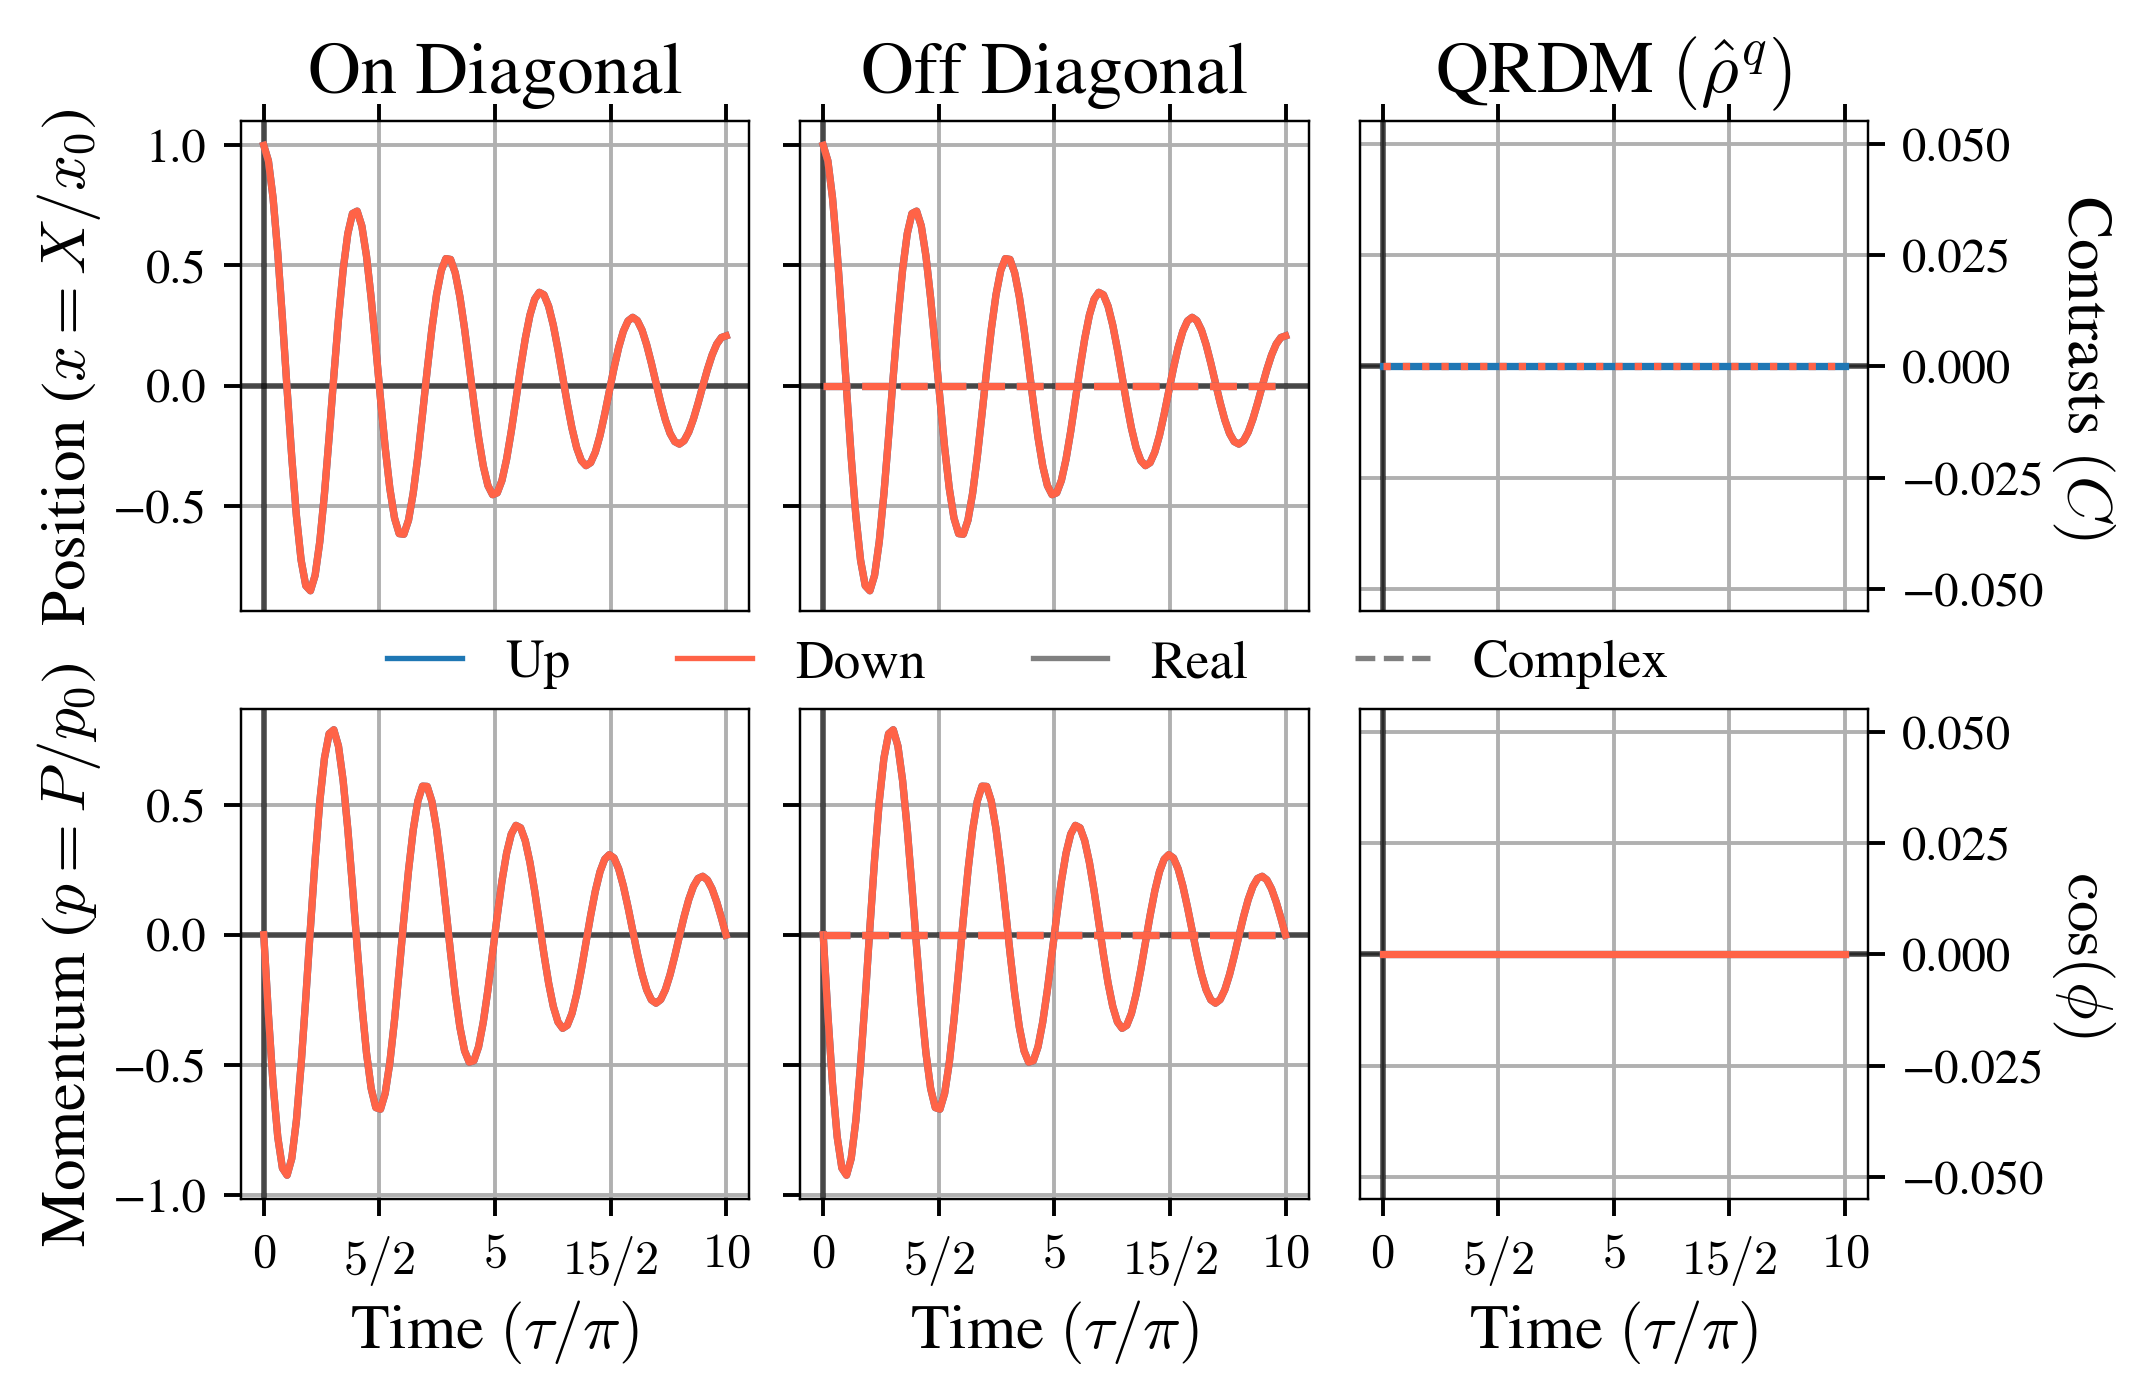

In [5]:
gamma_C = 0.1
gamma_S = 0.1

N_qubits = 1
n_modes = 1

B_a = gamma_C*np.array([[0.,1.],[0.,0.]])

Dec = Decoherence(N_qubits,n_modes,'Ladder', B_a)


########################## Hamiltonians ##########################

H_1_general = Hamiltonian(N_qubits, n_modes)
H_1_force = Hamiltonian(N_qubits, n_modes)
H_1_gauss = Hamiltonian(N_qubits, n_modes)

H_null = np.zeros((2*n_modes,2*n_modes)) 
iden = np.eye(2*n_modes)
r_null = np.zeros((2*n_modes,1)) 

H_m = np.eye(2)
r_m = r_null
H_q = H_null
r_q = r_null

H_q_0_array = np.array([0 +0*1j])

H_1_general.Initialize_Constant_Hamiltonians([H_m, H_q], [r_m, r_q], H_q_0_array)
H_1_force.Initialize_Constant_Hamiltonians([H_m], [r_m, r_q], H_q_0_array)
H_1_gauss.Initialize_Constant_Hamiltonians([H_m], [r_m], H_q_0_array)

########################## Initialize State ##########################

r_0 = np.array([[1.0],
                [0.0]])
sigma_0 = iden
rho_q_0 = np.ones((2*N_qubits,2*N_qubits))/(2**(2*N_qubits))

gaussian_state_general = Quantum_State(N_qubits, n_modes)
gaussian_state_general.Initialize_Gaussian_State(r_0, sigma_0, rho_q_0)
gaussian_state_force = Quantum_State(N_qubits, n_modes)
gaussian_state_force.Initialize_Gaussian_State(r_0, sigma_0, rho_q_0)
gaussian_state_gauss = Quantum_State(N_qubits, n_modes)
gaussian_state_gauss.Initialize_Gaussian_State(r_0, sigma_0, rho_q_0)

########################## Dynamics ##########################

t_array = np.linspace(0,10*np.pi, 100)

gaussian_state_general.Open_Dynamics_Numerical(H_1_general, Dec,t_array)
#gaussian_state_force.Open_Dynamics_Numerical(H_1_force,E,D, t_array)
gaussian_state_gauss.Open_Dynamics_Numerical(H_1_gauss, Dec ,t_array)

########################## Plot First Moments ##########################
Parameter_list = []
array_pi = np.linspace(0,10,5)

gaussian_state_general.Plot_Phase_Space_First_QRDM(Parameter_list, array_pi, False);

## Linear Qubit-Mode Interaction: 
## Stern-Gerlach Interfereometry with Diffusion

### Semi-Analytical

This is a time independent operator-valued general Hamiltonian
Initializing a Gaussian State


/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


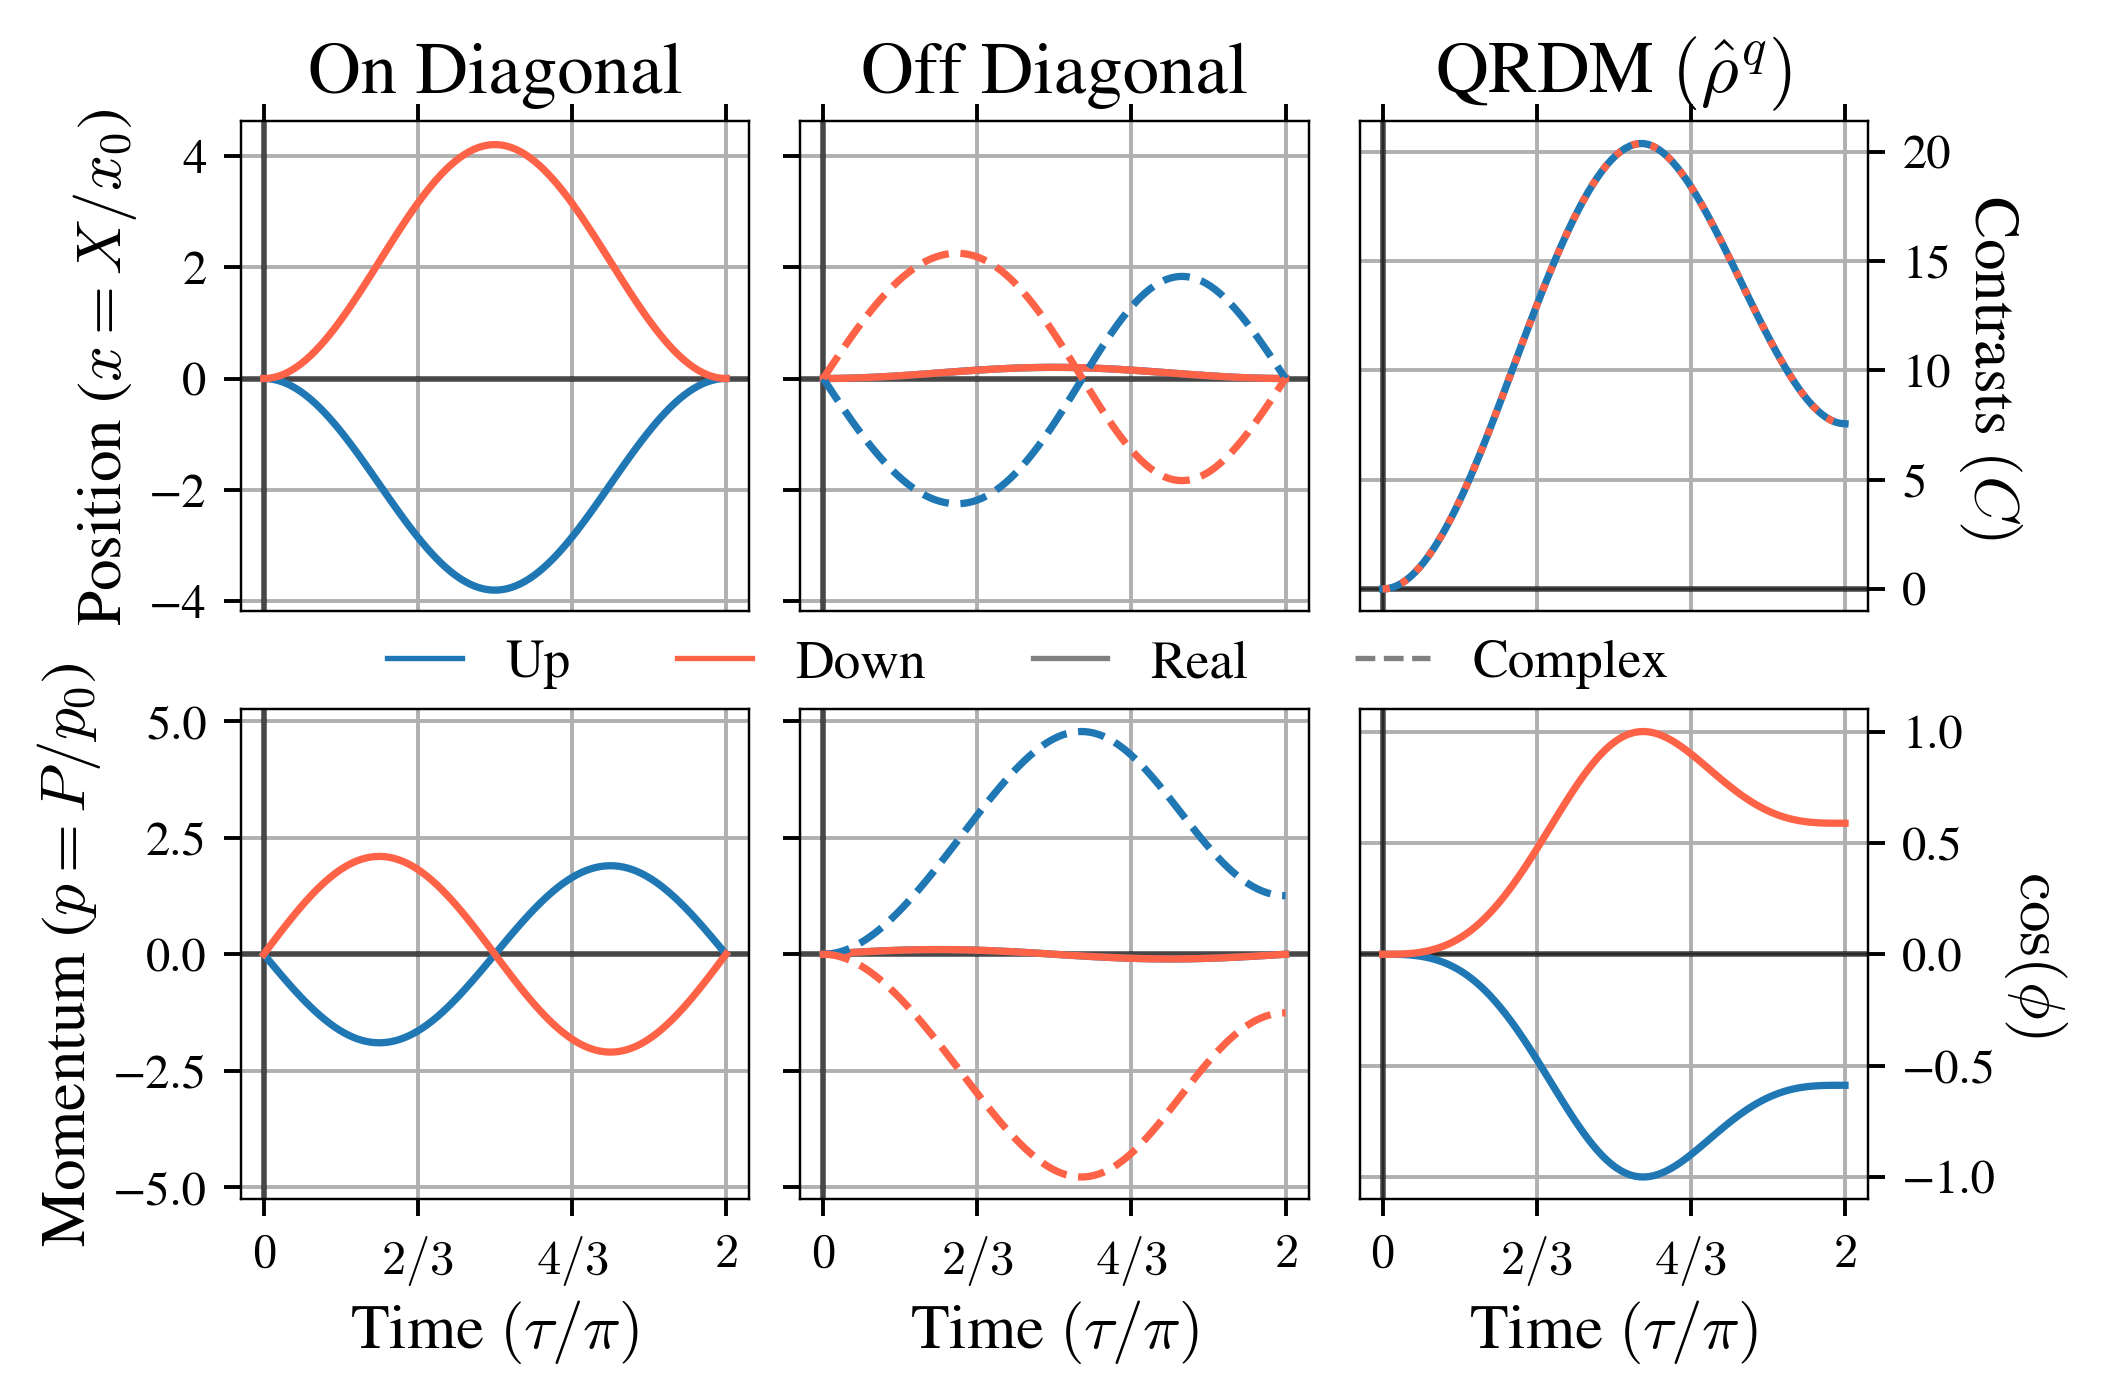

In [7]:
gamma_x = 0.1
f_q = 2
f_u = 0.1

B_mat =  gamma_x*np.array([[1.,0.],[0.,0.]])

N_qubits = 1
n_modes = 1


Dec = Decoherence(N_qubits,n_modes,'Canonical', B_mat)

N_qubits = 1
n_modes = 1

########################## Hamiltonians ##########################

H_1_general = Hamiltonian(N_qubits, n_modes)

H_null = np.zeros((2*n_modes,2*n_modes)) 
iden = np.eye(2*n_modes)
r_null = np.zeros((2*n_modes,1)) 

H_m = np.eye(2)
r_m = f_u*np.array([[1.0],[0.0]])
H_q = H_null
r_q =f_q*np.array([[1.0],[0.0]])

H_q_0_array = np.array([0 +0*1j])

H_1_general.Initialize_Constant_Hamiltonians([H_m, H_q], [r_m, r_q], H_q_0_array)

########################## Initialize State ##########################

r_0 = np.array([[0.0],
                [0.0]])
sigma_0 = iden
rho_q_0 = np.ones((2*N_qubits,2*N_qubits))/(2**(2*N_qubits))

gaussian_state_general = Quantum_State(N_qubits, n_modes)
gaussian_state_general.Initialize_Gaussian_State(r_0, sigma_0, rho_q_0)

########################## Dynamics ##########################

t_array = np.linspace(0,2*np.pi, 100)

E_mat = H_null
D_mat = np.array([[0,0],[0,0.3]])

gaussian_state_general.Open_Dynamics_Numerical(H_1_general,Dec,t_array)

########################## Plot First Moments ##########################

Parameter_list = []
array_pi = np.linspace(0,2,4)

gaussian_state_general.Plot_Phase_Space_First_QRDM(Parameter_list, array_pi, False);


## Quadratic Mode-Qubits Interaction: 
## An Atom and a Cavity Interacting via Dissipative Coupling under Cavity Decay
### Numerical

This is a time independent operator-valued general Hamiltonian
Initializing a Gaussian State


/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


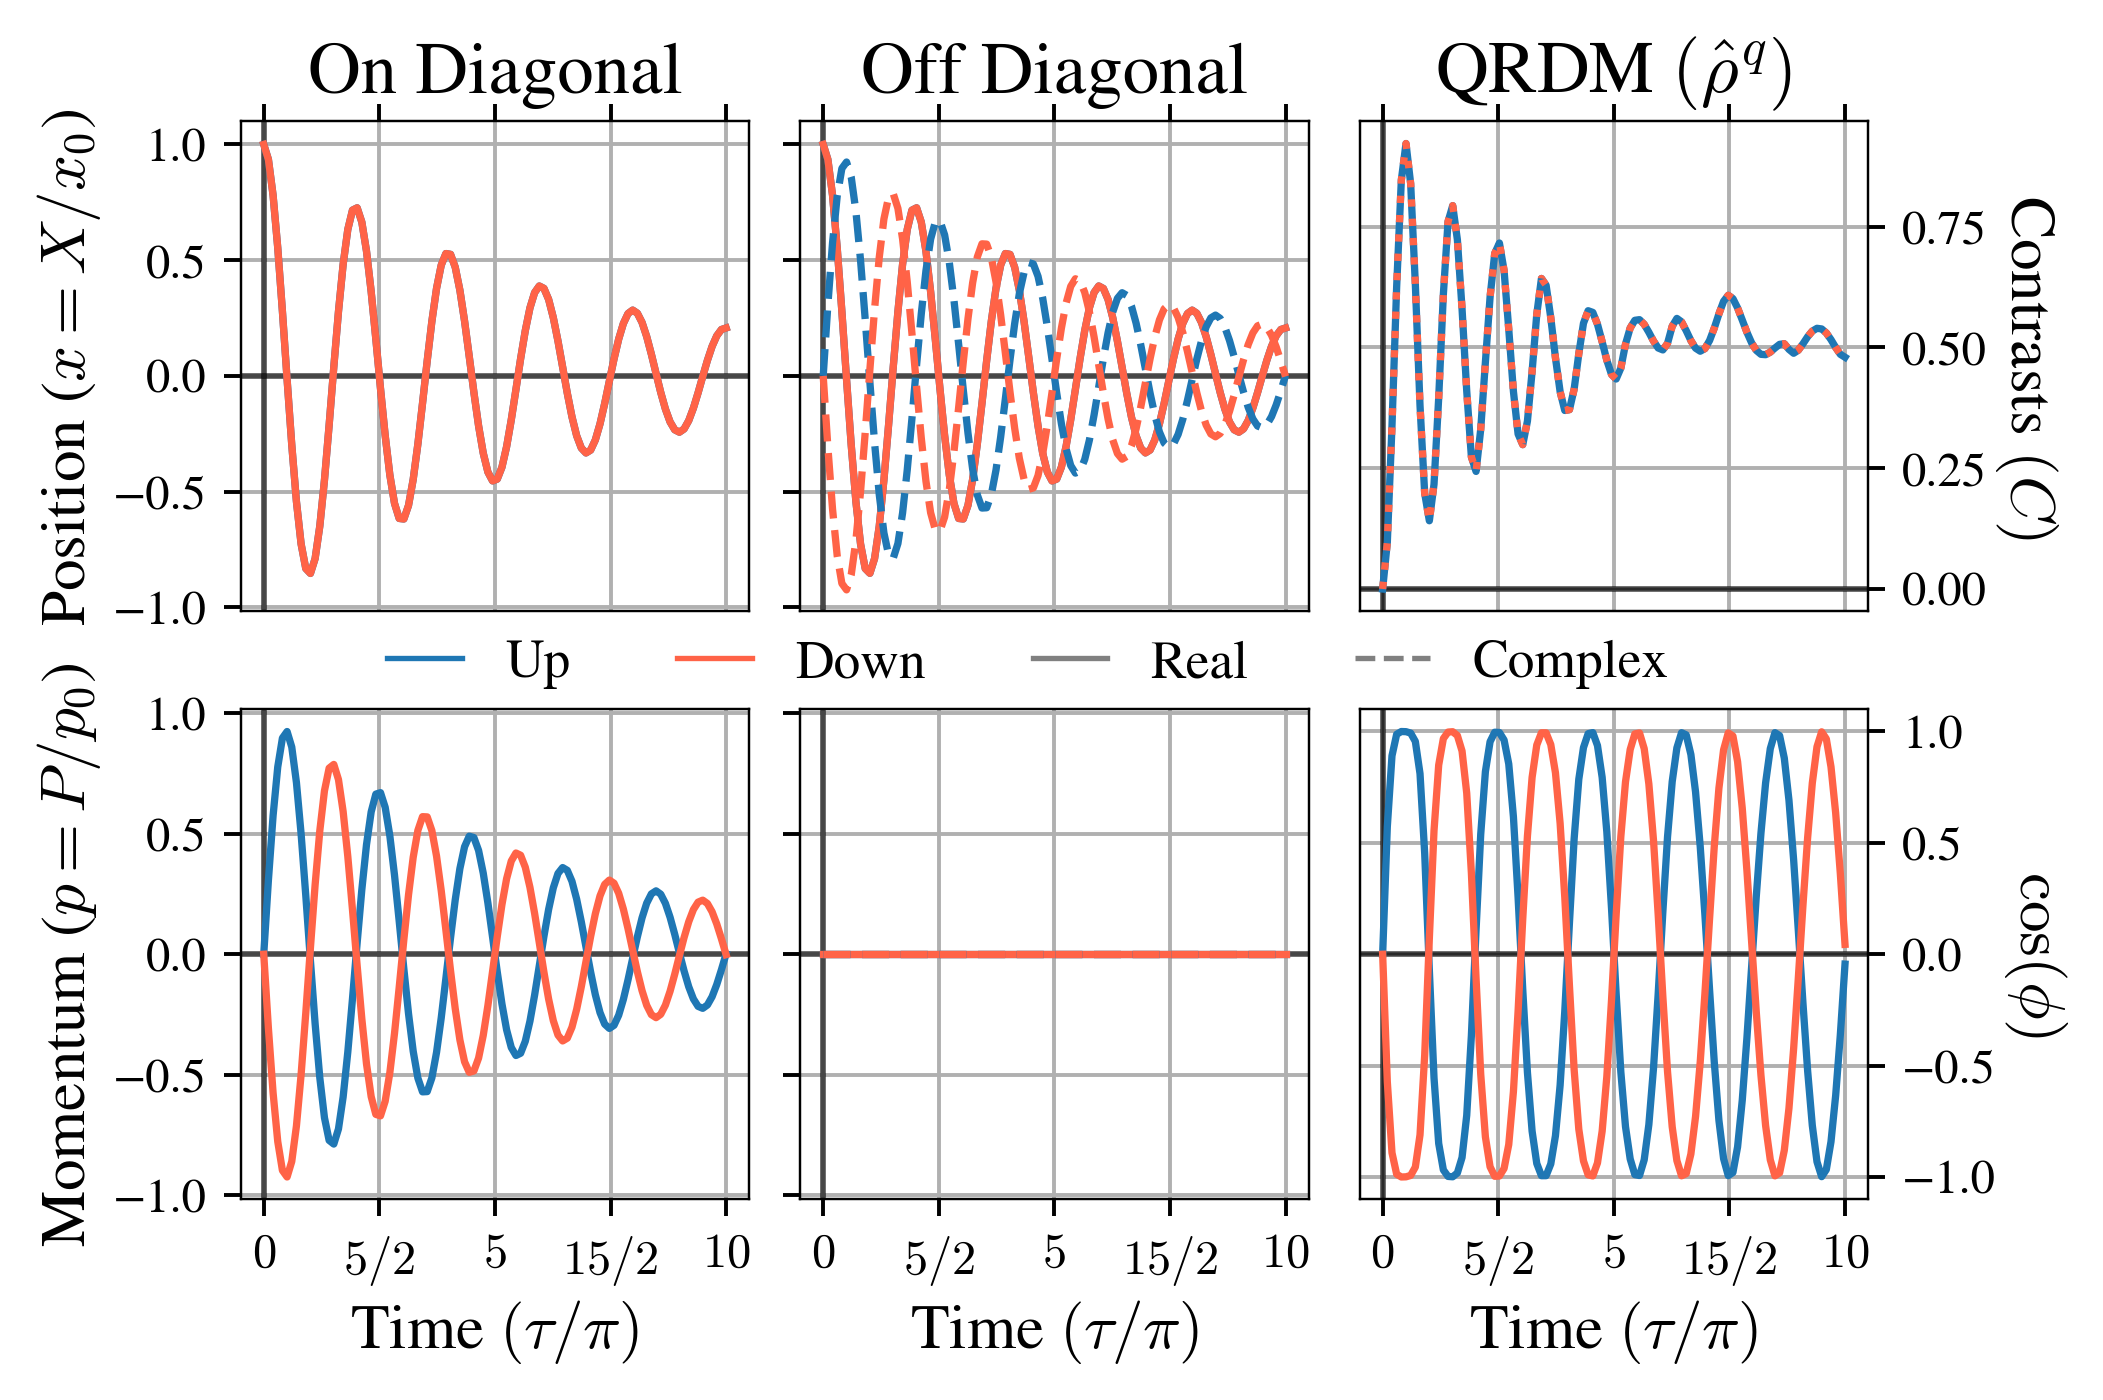

In [6]:
gamma_C = 0.1
gamma_S = 0.1

N_qubits = 1
n_modes = 1

B_a = gamma_C*np.array([[0.,1.],[0.,0.]])

Dec = Decoherence(N_qubits,n_modes,'Ladder', B_a)

########################## Hamiltonians ##########################

H_1_general = Hamiltonian(N_qubits, n_modes)

H_null = np.zeros((2*n_modes,2*n_modes)) 
iden = np.eye(2*n_modes)
r_null = np.zeros((2*n_modes,1)) 

H_m = H_null
r_m = r_null
H_q = np.eye(2)
r_q = r_null

H_q_0_array = np.array([0 +0*1j])

H_1_general.Initialize_Constant_Hamiltonians([H_m, H_q], [r_m, r_q], H_q_0_array)

########################## Initialize State ##########################

r_0 = np.array([[1.0],
                [0.0]])
sigma_0 = iden
rho_q_0 = np.ones((2*N_qubits,2*N_qubits))/(2**(2*N_qubits))

GCS = Quantum_State(N_qubits, n_modes)
GCS.Initialize_Gaussian_State(r_0, sigma_0, rho_q_0)


########################## Dynamics ##########################

t_array = np.linspace(0,10*np.pi, 100)

GCS.Open_Dynamics_Numerical(H_1_general, Dec ,t_array)

########################## Plot First Moments ##########################
Parameter_list = []
array_pi = np.linspace(0,10,5)

GCS.Plot_Phase_Space_First_QRDM(Parameter_list, array_pi, False);